<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Artificial-Intelligence/blob/main/Test_with_different_optimizer_algorithms_(gradient_descent)_Adam%2C_SGD_and_RMSprop_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Test with different optimizer algorithms (gradient descent) Adam, SGD and RMSprop in TensorFlow** 


Rodrigo Rene Menegazzo

Prática: Predição de Biomassa de Árvores e teste de algoritmos otimizadores.

Predição de Biomassa de Árvores, baseado em:
  * dap : diâmetro na altura do peito (1,30m)
  * h : altura
  * Me : densidade

Importação das biliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
tf.__version__

'2.8.2'

Carga da Base

In [2]:
!wget http://www.razer.net.br/datasets/Biomassa_REG.csv
data = pd.read_csv("Biomassa_REG.csv", sep=";", decimal=",").values
X = data[:,0:3].astype(float)
Y = data[:,3].astype(float)

--2022-06-09 09:19:52--  http://www.razer.net.br/datasets/Biomassa_REG.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82988 (81K) [text/csv]
Saving to: ‘Biomassa_REG.csv.2’

Biomassa_REG.csv.2  100%[===================>]  81.04K  --.-KB/s    in 0.1s    

2022-06-09 09:19:53 (686 KB/s) - ‘Biomassa_REG.csv.2’ saved [82988/82988]



Separar a base em Treino e Teste

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

dap_train = x_train[:,0]
h_train = x_train[:,1]

dap_test = x_test[:,0]
h_test = x_test[:,1]

Criação do modelo

3 Camadas
  * Entrada: que recebe um vetor (3,)
  * Escondida: com 50 neurônios e função de ativação ReLU
  * Saída: Como é regressão, 1 neurônio e sem função de ativação (linear)

In [4]:
i = tf.keras.layers.Input(shape=(3,))
x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

Novas Métricas para o Treino
  * Pode-se implementar qualquer métrica, em geral usa-se MSE (já implementada)
  * Aqui serão adicionadas 2 Métricas
   * Funções para cálculo
   * RMSE: Raiz Quadrada do Erro Médio Quadrático
   * R2: Coeficiente de Determinação
   

In [5]:
def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) )

def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num = backend.sum (backend.square(y_true - y_pred))
  den = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

Compilação e Treino do Modelo

Ao compilar o modelo escolhe-se:
  * O algoritmo otimizador (descida de gradiente)
  * A função de perda (loss function)
  * As métricas

In [6]:
#optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
#optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
optimizer=tf.keras.optimizers.RMSprop(0.01)

model.compile(optimizer=optimizer,
              loss="mse",
              metrics=[rmse, r2])

No treino, pode-se escolher parar antes de terminarem as épocas (EarlyStopping)
  * Cadastra-se como um callback no treino
  * patience: para quando resultar neste número de épocas sem melhora
  * restore_best_weights: se é para restaurar os pesos da melhor época

In [7]:
early_stop = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=20,
                        restore_best_weights=True)
rr = model.fit(x_train, y_train,
              epochs=1500,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Epoch 1/1500
84/84 [==============================] - 2s 7ms/step - loss: 12062645.0000 - rmse: 948.1693 - r2: 0.0376 - val_loss: 19099108.0000 - val_rmse: 1120.9838 - val_r2: 0.2418
Epoch 2/1500
84/84 [==============================] - 0s 4ms/step - loss: 8721275.0000 - rmse: 988.6434 - r2: 0.3658 - val_loss: 14562465.0000 - val_rmse: 1343.2211 - val_r2: 0.3786
Epoch 3/1500
84/84 [==============================] - 0s 5ms/step - loss: 7081222.5000 - rmse: 1226.3710 - r2: -0.0987 - val_loss: 12942915.0000 - val_rmse: 1468.6487 - val_r2: 0.2749
Epoch 4/1500
84/84 [==============================] - 0s 4ms/step - loss: 6453705.5000 - rmse: 1242.8773 - r2: -0.3859 - val_loss: 12046747.0000 - val_rmse: 1477.7926 - val_r2: 0.2366
Epoch 5/1500
84/84 [==============================] - 0s 4ms/step - loss: 6039522.0000 - rmse: 1252.0870 - r2: -0.3545 - val_loss: 11784572.0000 - val_rmse: 1278.8015 - val_r2: 0.3974
Epoch 6/1500
84/84 [==============================] - 0s 4ms/step - loss: 5686440.0

Avaliação do modelo

Plotar os valores da função de perda (loss e val_loss) e das métricas RMSE
(rmse e val_rmse) e R2 (r2 e val_r2)

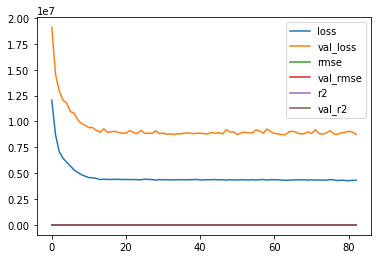

In [8]:
plt.plot( rr.history["loss"], label="loss" )
plt.plot( rr.history["val_loss"], label="val_loss" )
plt.legend()

plt.plot( rr.history["rmse"], label="rmse" )
plt.plot( rr.history["val_rmse"], label="val_rmse" )
plt.legend()

plt.plot( rr.history["r2"], label="r2" )
plt.plot( rr.history["val_r2"], label="val_r2" )
plt.legend()

Faz-se predições e calcula-se a qualidade do modelo

In [9]:
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mse = ", mse)
print("rmse = ", rmse)
print("r2 = ", r2)

mse =  8720033.65348214
rmse =  2952.9703102947274
r2 =  0.595844031422569


Plotar o Gráfico de Regressão
  * Baseado no DAP como eixo X

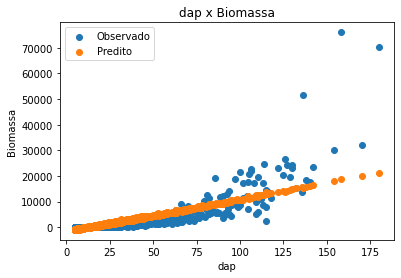

In [10]:
plt.scatter(dap_test, y_test, label="Observado")
plt.scatter(dap_test, y_pred, label="Predito")
plt.title("dap x Biomassa")
plt.xlabel("dap")
plt.ylabel("Biomassa")
plt.legend()
plt.show()

**Test with different optimizer algorithms (gradient descent)**

optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)

  * mse =  2125833.6904375567
  * rmse =  1458.0238991311346
  * r2 =  0.8300823011846128

optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
  * mse =  15387339.482373986
  * rmse =  3922.6699430839176
  * r2 =  -1.9484400981539807e-07

optimizer=tf.keras.optimizers.RMSprop(0.01)
  * mse =  8720033.65348214
  * rmse =  2952.9703102947274
  * r2 =  0.595844031422569

**The best optimizer for this dataset was the ADAM with the lower value of RMSE and the higher value of R2.**

